ValueError: x and y must have same first dimension, but have shapes (9,) and (8,)

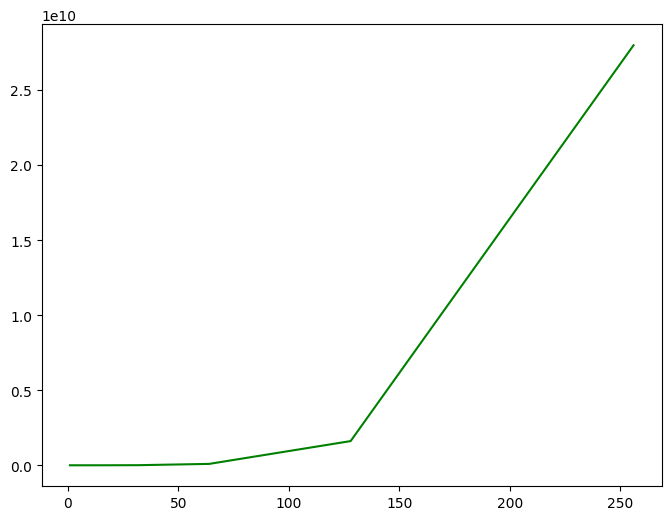

In [7]:
import sys
from tempfile import tempdir
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from functools import cache

sys.setrecursionlimit(50000)

def readVault(filename):
    file = open(filename, 'r').readlines()
    matrix = [list(map(int, line.strip().split(','))) for line in file]
    matrix = tuple(tuple(row) for row in matrix)
    return matrix

@cache
def findPathWCache(A, x, y, path):
    nrow = len(A)
    ncol = len(A[0])
    
    if x == nrow - 1 and y == ncol - 1:
        return path[::-1], A[x][y]
    elif x == nrow - 1:
        path += "W"
        next_path, next_val = findPathWCache(A, x, y + 1, path)
        return next_path, A[x][y] + next_val
    elif y == ncol - 1:
        path += "N"
        next_path, next_val = findPathWCache(A, x + 1, y, path)
        return next_path, A[x][y] + next_val
    
    # if go south(N)
    pN, cN = findPathWCache(A, x + 1, y, path)
    # if go east(W)
    pW, cW = findPathWCache(A, x, y + 1, path)
    
    if cN > cW: 
        pN += "N"
        return pN, A[x][y] + cN
    else:
        pW += "W"
        return pW, A[x][y] + cW


def findPathNCache(A, x, y, path):
    nrow = len(A)
    ncol = len(A[0])
    
    if x == nrow - 1 and y == ncol - 1:
        return path[::-1], A[x][y]
    elif x == nrow - 1:
        path += "W"
        next_path, next_val = findPathNCache(A, x, y + 1, path)
        return next_path, A[x][y] + next_val
    elif y == ncol - 1:
        path += "N"
        next_path, next_val = findPathNCache(A, x + 1, y, path)
        return next_path, A[x][y] + next_val
    
    # if go south(N)
    pN, cN = findPathNCache(A, x + 1, y, path)
    # if go east(W)
    pW, cW = findPathNCache(A, x, y + 1, path)
    
    if cN > cW: 
        pN += "N"
        return pN, A[x][y] + cN
    else:
        pW += "W"
        return pW, A[x][y] + cW
# A = [[0, 4, 1, 3, 11],
#      [8, 2, 4, 5, 6],
#      [1, 7, 3, 9, 0],
#      [0, 12, 1, 2, 0]]


# timeB = time.perf_counter_ns()
# p = ""
# path, coin = findPath(A, 0, 0, p)
# timeA = time.perf_counter_ns() - timeB
# print(path)
# print(coin)
# print(timeA)


# write a function to get an array of size N
def getN(x, y):
    tmp = x
    ans = [tmp]
    
    while tmp < y:
        tmp = tmp * 2
        ans.append(tmp)
    
    return ans

# get Matrix
def getMatrix(row, column):
    ans = []
    for i in range(int(row)):
        temp = []
        for j in range(int(column)):
            temp.append(random.randrange(0, 1000))
        ans.append(temp)
    return tuple(map(tuple,ans))

# get the runtime array with cache
def getTime(arrN):
    timeS = []
    for i in range(len(arrN)):
        # Square
        a_S = getMatrix(arrN[i], arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findPathWCache(a_S, 0, 0, "")
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS 

# get the runtime array without cache
def getTimeNoC(arrN):
    timeS = []
    for i in range(len(arrN)):
        # Square
        a_S = getMatrix(arrN[i], arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findPathWCache(a_S, 0, 0, "")
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS

def getExpResult():
    arrN = getN(1, 256)
    noN = [1, 2, 4]
    nocache = getTimeNoC(noN)
    for i in range(len(arrN)):
        if i > len(nocache):
            nocache.append(0)
        
    time = getTime(arrN)
    
    # save plot
    plt.figure(figsize=(8, 6))

    plt.plot(arrN, time, label='Sqaure Matrix Runtime (with @cache)', color='green')
    plt.plot(arrN, nocache, label='Sqaure Matrix Runtime (without @cache)', color='red', linestyle="dashed")
    plt.xlabel('N')
    plt.ylabel('Runtime (nanoseconds)')
    plt.title('Vault.py Runtime')
    plt.legend()

    plt.savefig('q1.png')

    fig, ax =plt.subplots(1, 1)

    table = pd.DataFrame()
    table['With Cache (nanoseconds)'] = time
    table['Without Cache (nanoseconds)'] = nocache
    ax.axis('tight')
    ax.axis('off')

    #plotting data
    table = ax.table(cellText = table.values,
            colLabels = table.columns,
            rowLabels = arrN,
            loc="center")
    table.set_fontsize(14)
    table.scale(1,2)
    plt.savefig('q1_table.png')
    return 0

def main():
    # filename = sys.argv[1]
    # matrix = readVault(filename)
    # p = ""
    # timeB = time.perf_counter_ns()
    # path, coin= findPath(matrix, 0, 0, p)
    # timeA = time.perf_counter_ns() - timeB
    # print(path)
    # print(coin)
    # print(timeA)
    getExpResult()
    

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Input arguments number is wrong!")
        sys.exit(1)
    main()

In [8]:
import sys
from tempfile import tempdir
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from functools import cache

sys.setrecursionlimit(50000)

def readVault(filename):
    file = open(filename, 'r').readlines()
    matrix = [list(map(int, line.strip().split(','))) for line in file]
    matrix = tuple(tuple(row) for row in matrix)
    return matrix

@cache
def findPathWCache(A, x, y, path):
    nrow = len(A)
    ncol = len(A[0])
    
    if x == nrow - 1 and y == ncol - 1:
        return path[::-1], A[x][y]
    elif x == nrow - 1:
        path += "W"
        next_path, next_val = findPathWCache(A, x, y + 1, path)
        return next_path, A[x][y] + next_val
    elif y == ncol - 1:
        path += "N"
        next_path, next_val = findPathWCache(A, x + 1, y, path)
        return next_path, A[x][y] + next_val
    
    # if go south(N)
    pN, cN = findPathWCache(A, x + 1, y, path)
    # if go east(W)
    pW, cW = findPathWCache(A, x, y + 1, path)
    
    if cN > cW: 
        pN += "N"
        return pN, A[x][y] + cN
    else:
        pW += "W"
        return pW, A[x][y] + cW


def findPathNCache(A, x, y, path):
    nrow = len(A)
    ncol = len(A[0])
    
    if x == nrow - 1 and y == ncol - 1:
        return path[::-1], A[x][y]
    elif x == nrow - 1:
        path += "W"
        next_path, next_val = findPathNCache(A, x, y + 1, path)
        return next_path, A[x][y] + next_val
    elif y == ncol - 1:
        path += "N"
        next_path, next_val = findPathNCache(A, x + 1, y, path)
        return next_path, A[x][y] + next_val
    
    # if go south(N)
    pN, cN = findPathNCache(A, x + 1, y, path)
    # if go east(W)
    pW, cW = findPathNCache(A, x, y + 1, path)
    
    if cN > cW: 
        pN += "N"
        return pN, A[x][y] + cN
    else:
        pW += "W"
        return pW, A[x][y] + cW
# A = [[0, 4, 1, 3, 11],
#      [8, 2, 4, 5, 6],
#      [1, 7, 3, 9, 0],
#      [0, 12, 1, 2, 0]]


# timeB = time.perf_counter_ns()
# p = ""
# path, coin = findPath(A, 0, 0, p)
# timeA = time.perf_counter_ns() - timeB
# print(path)
# print(coin)
# print(timeA)


# write a function to get an array of size N
def getN(x, y):
    tmp = x
    ans = [tmp]
    
    while tmp < y:
        tmp = tmp * 2
        ans.append(tmp)
    
    return ans

# get Matrix
def getMatrix(row, column):
    ans = []
    for i in range(int(row)):
        temp = []
        for j in range(int(column)):
            temp.append(random.randrange(0, 1000))
        ans.append(temp)
    return tuple(map(tuple,ans))

# get the runtime array with cache
def getTime(arrN):
    timeS = []
    for i in range(len(arrN)):
        # Square
        a_S = getMatrix(arrN[i], arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findPathWCache(a_S, 0, 0, "")
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS 

# get the runtime array without cache
def getTimeNoC(arrN):
    timeS = []
    for i in range(len(arrN)):
        # Square
        a_S = getMatrix(arrN[i], arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findPathWCache(a_S, 0, 0, "")
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS

def getExpResult():
    arrN = getN(1, 256)
    
    noN = [1, 2, 4]
    nocache = getTimeNoC(noN)
    for i in range(len(arrN) - 3):
        nocache.append(0)
    
    
    time = getTime(arrN)
    
    # save plot
    plt.figure(figsize=(8, 6))

    plt.plot(arrN, time, label='Runtime (with @cache)', color='green')
    plt.plot(arrN, nocache, label='Runtime (without @cache)', color='red', linestyle="dashed")
    plt.xlabel('N')
    plt.ylabel('Runtime (nanoseconds)')
    plt.title('Vault.py Runtime')
    plt.legend()

    plt.savefig('q1.png')

    fig, ax =plt.subplots(1, 1)

    table = pd.DataFrame()
    table['With Cache (nanoseconds)'] = time
    table['Without Cache (nanoseconds)'] = nocache
    ax.axis('tight')
    ax.axis('off')

    #plotting data
    table = ax.table(cellText = table.values,
            colLabels = table.columns,
            rowLabels = arrN,
            loc="center")
    table.set_fontsize(14)
    table.scale(1,2)
    plt.savefig('q1_table.png')
    return 0

def main():
    # filename = sys.argv[1]
    # matrix = readVault(filename)
    # p = ""
    # timeB = time.perf_counter_ns()
    # path, coin= findPath(matrix, 0, 0, p)
    # timeA = time.perf_counter_ns() - timeB
    # print(path)
    # print(coin)
    # print(timeA)
    getExpResult()
    

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Input arguments number is wrong!")
        sys.exit(1)
    main()

KeyboardInterrupt: 

[1959, 3792, 13542, 0, 0, 0, 0, 0, 0]


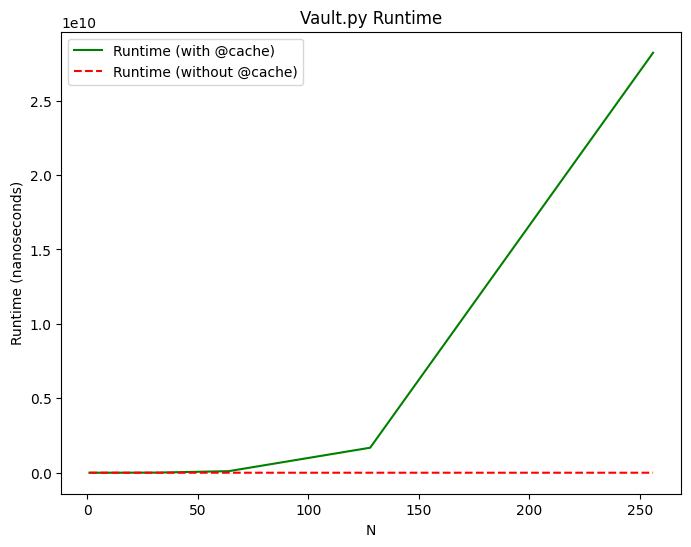

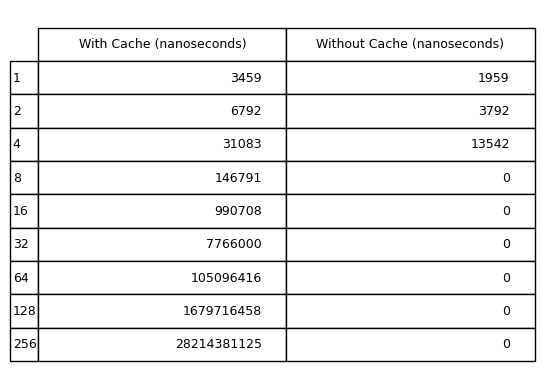

In [9]:
import sys
from tempfile import tempdir
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from functools import cache

sys.setrecursionlimit(50000)

def readVault(filename):
    file = open(filename, 'r').readlines()
    matrix = [list(map(int, line.strip().split(','))) for line in file]
    matrix = tuple(tuple(row) for row in matrix)
    return matrix

@cache
def findPathWCache(A, x, y, path):
    nrow = len(A)
    ncol = len(A[0])
    
    if x == nrow - 1 and y == ncol - 1:
        return path[::-1], A[x][y]
    elif x == nrow - 1:
        path += "W"
        next_path, next_val = findPathWCache(A, x, y + 1, path)
        return next_path, A[x][y] + next_val
    elif y == ncol - 1:
        path += "N"
        next_path, next_val = findPathWCache(A, x + 1, y, path)
        return next_path, A[x][y] + next_val
    
    # if go south(N)
    pN, cN = findPathWCache(A, x + 1, y, path)
    # if go east(W)
    pW, cW = findPathWCache(A, x, y + 1, path)
    
    if cN > cW: 
        pN += "N"
        return pN, A[x][y] + cN
    else:
        pW += "W"
        return pW, A[x][y] + cW


def findPathNCache(A, x, y, path):
    nrow = len(A)
    ncol = len(A[0])
    
    if x == nrow - 1 and y == ncol - 1:
        return path[::-1], A[x][y]
    elif x == nrow - 1:
        path += "W"
        next_path, next_val = findPathNCache(A, x, y + 1, path)
        return next_path, A[x][y] + next_val
    elif y == ncol - 1:
        path += "N"
        next_path, next_val = findPathNCache(A, x + 1, y, path)
        return next_path, A[x][y] + next_val
    
    # if go south(N)
    pN, cN = findPathNCache(A, x + 1, y, path)
    # if go east(W)
    pW, cW = findPathNCache(A, x, y + 1, path)
    
    if cN > cW: 
        pN += "N"
        return pN, A[x][y] + cN
    else:
        pW += "W"
        return pW, A[x][y] + cW
# A = [[0, 4, 1, 3, 11],
#      [8, 2, 4, 5, 6],
#      [1, 7, 3, 9, 0],
#      [0, 12, 1, 2, 0]]


# timeB = time.perf_counter_ns()
# p = ""
# path, coin = findPath(A, 0, 0, p)
# timeA = time.perf_counter_ns() - timeB
# print(path)
# print(coin)
# print(timeA)


# write a function to get an array of size N
def getN(x, y):
    tmp = x
    ans = [tmp]
    
    while tmp < y:
        tmp = tmp * 2
        ans.append(tmp)
    
    return ans

# get Matrix
def getMatrix(row, column):
    ans = []
    for i in range(int(row)):
        temp = []
        for j in range(int(column)):
            temp.append(random.randrange(0, 1000))
        ans.append(temp)
    return tuple(map(tuple,ans))

# get the runtime array with cache
def getTime(arrN):
    timeS = []
    for i in range(len(arrN)):
        # Square
        a_S = getMatrix(arrN[i], arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findPathWCache(a_S, 0, 0, "")
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS 

# get the runtime array without cache
def getTimeNoC(arrN):
    timeS = []
    for i in range(len(arrN)):
        # Square
        a_S = getMatrix(arrN[i], arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findPathWCache(a_S, 0, 0, "")
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS

def getExpResult():
    arrN = getN(1, 256)
    
    noN = [1, 2, 4]
    nocache = getTimeNoC(noN)
    for i in range(len(arrN) - 3):
        nocache.append(0)
    print(nocache)
    
    
    time = getTime(arrN)
    
    # save plot
    plt.figure(figsize=(8, 6))

    plt.plot(arrN, time, label='Runtime (with @cache)', color='green')
    plt.plot(arrN, nocache, label='Runtime (without @cache)', color='red', linestyle="dashed")
    plt.xlabel('N')
    plt.ylabel('Runtime (nanoseconds)')
    plt.title('Vault.py Runtime')
    plt.legend()

    plt.savefig('q1.png')

    fig, ax =plt.subplots(1, 1)

    table = pd.DataFrame()
    table['With Cache (nanoseconds)'] = time
    table['Without Cache (nanoseconds)'] = nocache
    ax.axis('tight')
    ax.axis('off')

    #plotting data
    table = ax.table(cellText = table.values,
            colLabels = table.columns,
            rowLabels = arrN,
            loc="center")
    table.set_fontsize(14)
    table.scale(1,2)
    plt.savefig('q1_table.png')
    return 0

def main():
    # filename = sys.argv[1]
    # matrix = readVault(filename)
    # p = ""
    # timeB = time.perf_counter_ns()
    # path, coin= findPath(matrix, 0, 0, p)
    # timeA = time.perf_counter_ns() - timeB
    # print(path)
    # print(coin)
    # print(timeA)
    getExpResult()
    

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Input arguments number is wrong!")
        sys.exit(1)
    main()